In [43]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
data = pd.read_csv('../../data/processed/data.csv', index_col=0) #<-Load w/out the unnecessary 'Unnamed:0' column.
data.head()

,Major,Minor,SalePrice,DocumentDate,ZipCode,Stories,BldgGrade,Condition,Bedrooms,Bathrooms,...,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,YrBuilt,YrRenovated,SqFtLot,Township,AirportNoise,WfntFootage
0,638580,110,190000,07/14/2015,98188,1.0,7.0,3.0,4.0,2.0,...,0.0,0.0,300.0,5.0,1963.0,0.0,10534.0,23.0,0.0,0.0
1,126320,110,375000,10/30/2017,98106,2.0,6.0,3.0,3.0,1.0,...,0.0,0.0,0.0,4.0,1919.0,0.0,4760.0,24.0,0.0,0.0
2,213043,120,560000,12/20/2019,98019,1.0,7.0,3.0,3.0,2.0,...,180.0,0.0,0.0,5.0,1989.0,0.0,10523.0,26.0,0.0,0.0
3,940652,630,435000,07/22/2019,98038,2.0,7.0,3.0,3.0,3.0,...,45.0,0.0,0.0,5.0,1994.0,0.0,7392.0,22.0,0.0,0.0
4,322303,9088,133000,12/05/2016,98070,1.5,6.0,3.0,1.0,2.0,...,0.0,70.0,480.0,4.0,1918.0,1980.0,136060.0,23.0,0.0,242.0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141545 entries, 0 to 141547
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Major              141545 non-null  int64  
 1   Minor              141545 non-null  int64  
 2   SalePrice          141545 non-null  int64  
 3   DocumentDate       141545 non-null  object 
 4   ZipCode            141545 non-null  int64  
 5   Stories            141545 non-null  float64
 6   BldgGrade          141545 non-null  float64
 7   Condition          141545 non-null  float64
 8   Bedrooms           141545 non-null  float64
 9   Bathrooms          141545 non-null  float64
 10  SqFtTotLiving      141545 non-null  float64
 11  SqFtTotBasement    141545 non-null  float64
 12  SqFtOpenPorch      141545 non-null  float64
 13  SqFtEnclosedPorch  141545 non-null  float64
 14  SqFtDeck           141545 non-null  float64
 15  HeatSystem         141545 non-null  float64
 16  Yr

In [6]:
data.describe()

,Major,Minor,SalePrice,ZipCode,Stories,BldgGrade,Condition,Bedrooms,Bathrooms,SqFtTotLiving,...,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,YrBuilt,YrRenovated,SqFtLot,Township,AirportNoise,WfntFootage
count,141545.000000,141545.000000,1.415450e+05,1.415450e+05,141545.000000,141545.000000,141545.000000,141545.000000,141545.000000,141545.000000,...,141545.000000,141545.000000,141545.000000,141545.000000,141545.000000,141545.000000,1.415450e+05,141545.000000,141545.0,141545.000000
mean,448728.218736,1562.838405,6.942912e+05,1.050155e+05,1.440351,7.577541,3.565227,3.402049,2.495871,2089.849596,...,65.869031,6.481691,140.719750,4.912925,1969.382493,116.526278,4.588788e+04,23.792412,0.0,8.071666
std,286620.447904,2851.067000,8.054475e+05,2.607710e+06,0.507238,1.190614,0.744951,0.950776,1.006218,956.901555,...,121.868734,42.291230,218.450465,1.044588,29.042281,468.617484,8.046268e+05,1.650141,0.0,183.441218
min,100.000000,1.000000,5.000000e+00,3.000000e+00,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,3.750000e+02,19.000000,0.0,0.000000
25%,202504.000000,115.000000,3.790000e+05,9.803200e+04,1.000000,7.000000,3.000000,3.000000,2.000000,1420.000000,...,0.000000,0.000000,0.000000,5.000000,1951.000000,0.000000,5.500000e+03,23.000000,0.0,0.000000
50%,383206.000000,326.000000,5.560000e+05,9.805900e+04,1.000000,7.000000,3.000000,3.000000,3.000000,1910.000000,...,0.000000,0.000000,0.000000,5.000000,1970.000000,0.000000,7.980000e+03,24.000000,0.0,0.000000
75%,722921.000000,1017.000000,8.000000e+05,9.811800e+04,2.000000,8.000000,4.000000,4.000000,3.000000,2550.000000,...,90.000000,0.000000,220.000000,5.000000,1992.000000,0.000000,1.140000e+04,25.000000,0.0,0.000000
max,990600.000000,9689.000000,6.250000e+07,9.811820e+08,4.000000,13.000000,5.000000,15.000000,16.000000,14980.000000,...,11570.000000,2330.000000,4290.000000,8.000000,2020.000000,2020.000000,2.330525e+07,26.000000,0.0,5300.000000


## Selecting Features

Since 'SalePrice is the target variable for my analysis, I will take a look at the distribution.

C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


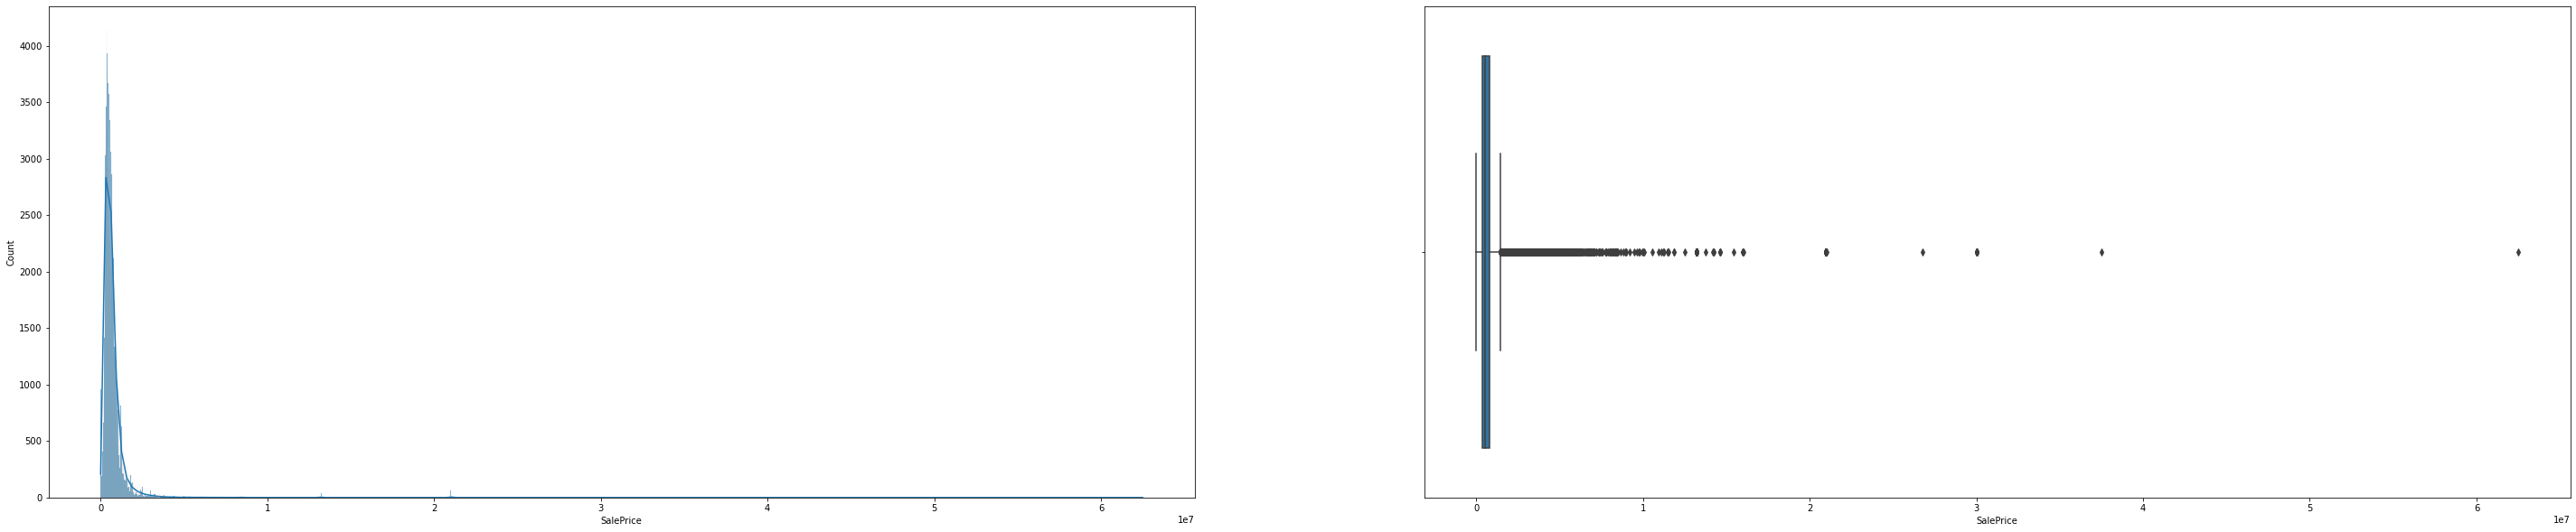

In [14]:
fig, ax = plt.subplots(1,2, figsize=(50,10))
sns.histplot(data.SalePrice, kde = True, ax = ax[0])
sns.boxplot(data.SalePrice, ax= ax[1]);

The data is largely skewed but the shape is decent. I will take a closer look at correlations of features I'd consider using in my model.

In [15]:
data[['SalePrice','BldgGrade','ZipCode','SqFtTotLiving','WfntFootage']].corr()

,SalePrice,BldgGrade,ZipCode,SqFtTotLiving,WfntFootage
SalePrice,1.000000,0.385261,-0.000397,0.388234,-0.014740
BldgGrade,0.385261,1.000000,0.000939,0.757756,-0.108447
ZipCode,-0.000397,0.000939,1.000000,-0.002372,-0.000118
SqFtTotLiving,0.388234,0.757756,-0.002372,1.000000,-0.050261
WfntFootage,-0.014740,-0.108447,-0.000118,-0.050261,1.000000


C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


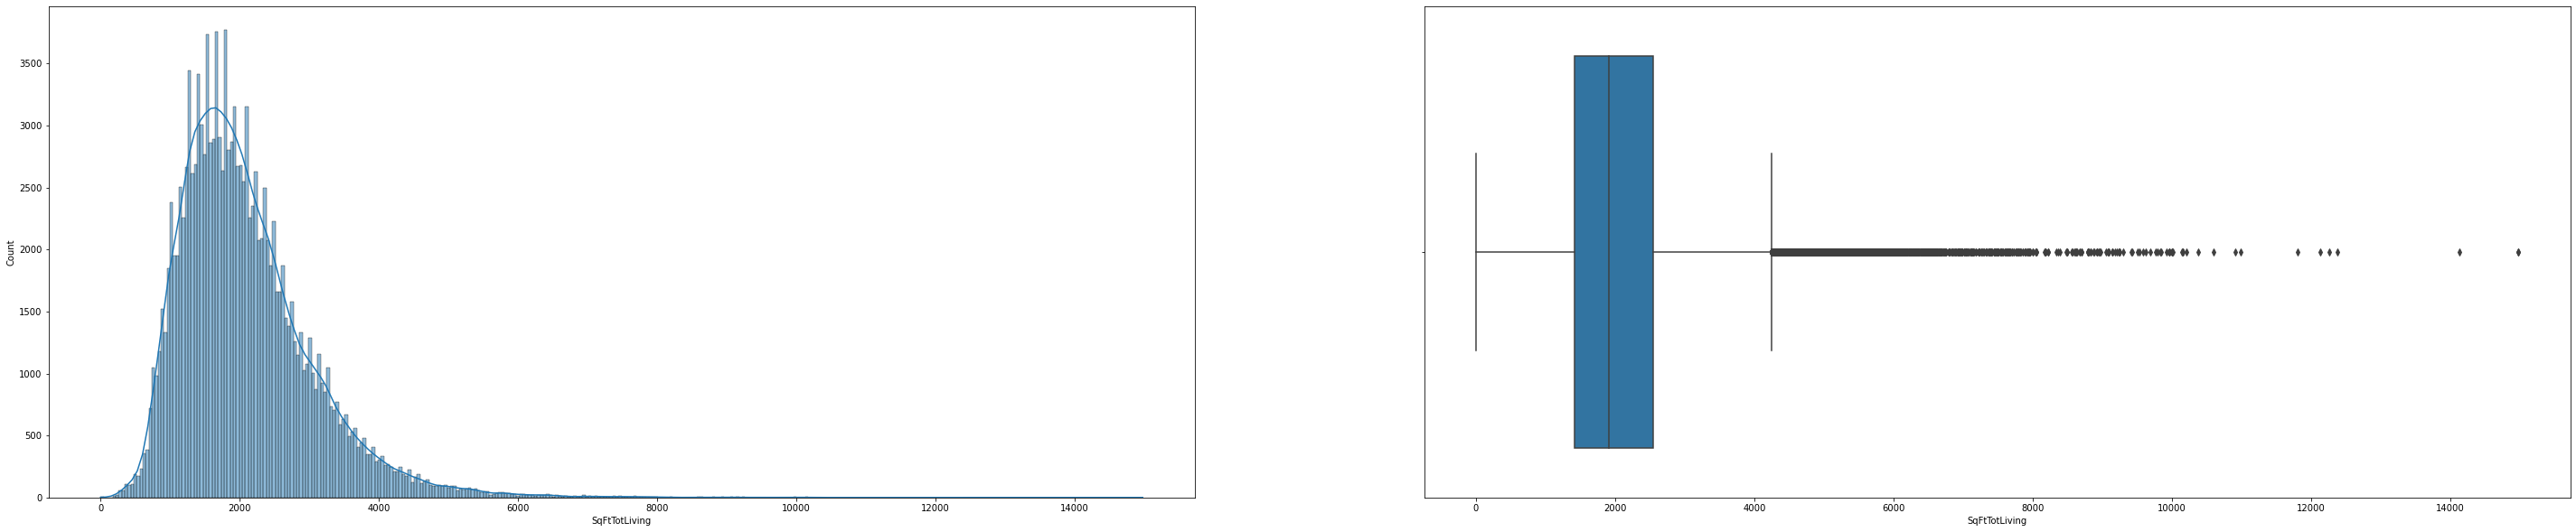

In [16]:
#There seems to be some correlation between SalePrice and SqFtTotLiving, as well as BldgGrade
fig, ax = plt.subplots(1,2, figsize=(50,10))
sns.histplot(data.SqFtTotLiving, kde=True, ax = ax[0])
sns.boxplot(data.SqFtTotLiving, ax= ax[1]);

I'll also examine BldgGrade closer:

C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


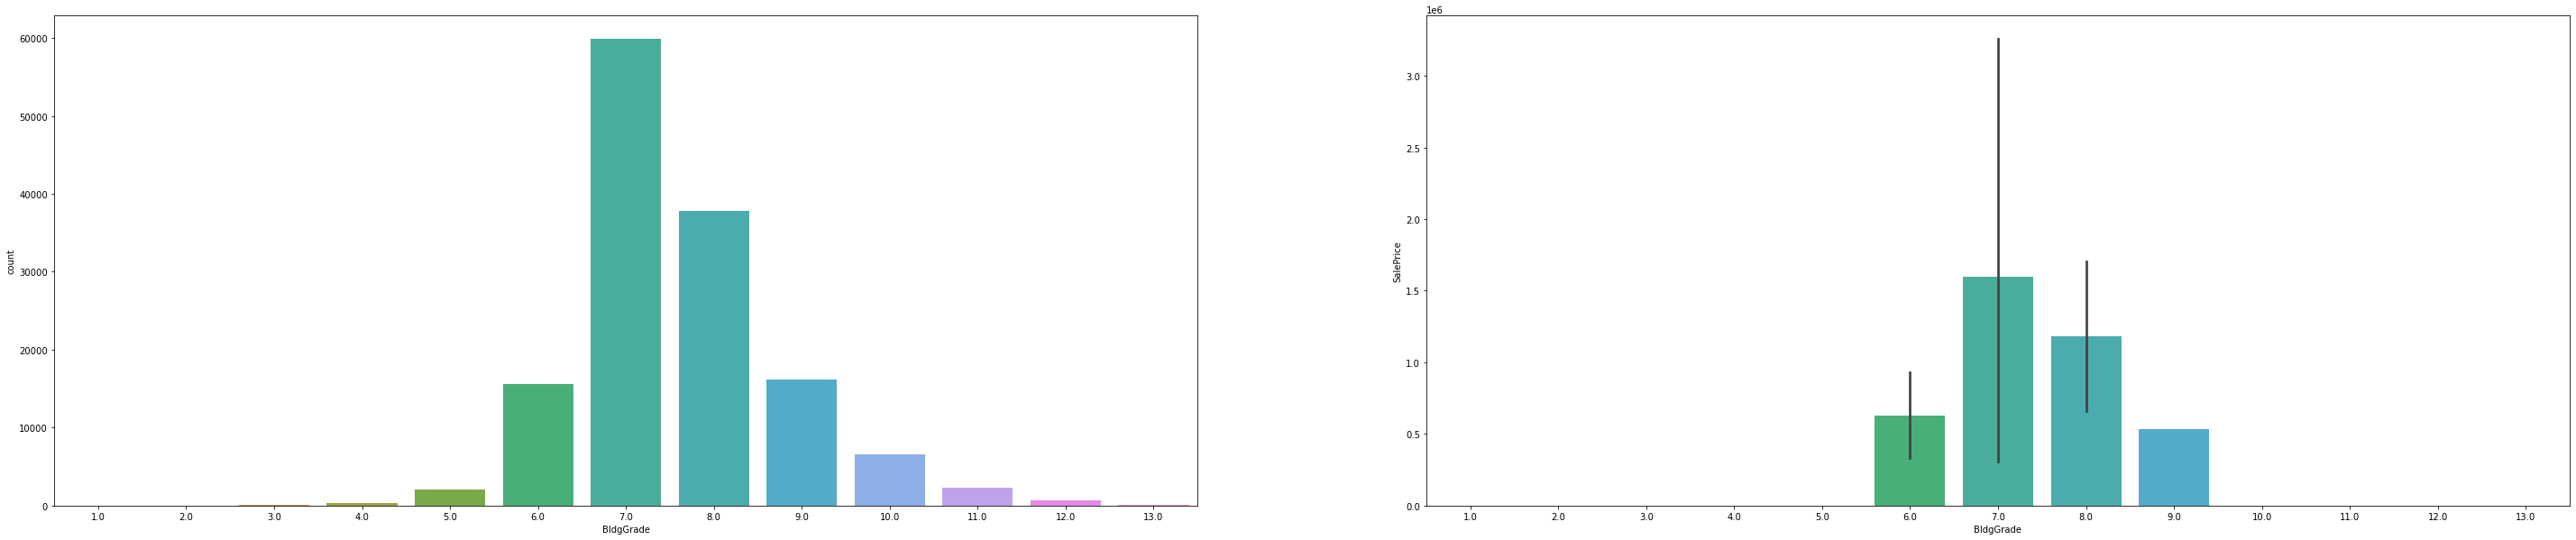

In [17]:
mean = data.SalePrice.groupby(data['BldgGrade']).mean()
grade = data.BldgGrade

fig, ax = plt.subplots(1,2, figsize=(50,10))
sns.countplot(data.BldgGrade, ax = ax[0])
sns.barplot(grade,mean, ax = ax[1]);

Based on this graph, houses with a building grade of 7, followed by 8, perfom the best in terms of price. I will examine more variables to consider as model features below.

In [20]:
data[['SalePrice','HeatSystem','SqFtOpenPorch','SqFtEnclosedPorch', 'SqFtDeck']].corr()

,SalePrice,HeatSystem,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck
SalePrice,1.000000,0.092098,0.192261,0.018606,0.123846
HeatSystem,0.092098,1.000000,0.089429,0.006235,0.116816
SqFtOpenPorch,0.192261,0.089429,1.000000,0.003693,0.005898
SqFtEnclosedPorch,0.018606,0.006235,0.003693,1.000000,0.025932
SqFtDeck,0.123846,0.116816,0.005898,0.025932,1.000000


Since none of these features seem to have correlations with SalePrice, I will see if they correlate to SqftTotLiving:

In [21]:
data[['SqFtTotLiving','HeatSystem','SqFtOpenPorch','SqFtEnclosedPorch', 'SqFtDeck']].corr()

,SqFtTotLiving,HeatSystem,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck
SqFtTotLiving,1.000000,0.256650,0.377893,0.012328,0.281603
HeatSystem,0.256650,1.000000,0.089429,0.006235,0.116816
SqFtOpenPorch,0.377893,0.089429,1.000000,0.003693,0.005898
SqFtEnclosedPorch,0.012328,0.006235,0.003693,1.000000,0.025932
SqFtDeck,0.281603,0.116816,0.005898,0.025932,1.000000


There doesn't seem to be much correlation between these, so I'll have a look at the age of the house (year built) and when it was renovated in relation to its price.

In [22]:
data[['SalePrice','YrBuilt','YrRenovated','SqFtTotLiving']].corr()

,SalePrice,YrBuilt,YrRenovated,SqFtTotLiving
SalePrice,1.000000,0.057668,0.069065,0.388234
YrBuilt,0.057668,1.000000,-0.237250,0.320372
YrRenovated,0.069065,-0.237250,1.000000,0.069206
SqFtTotLiving,0.388234,0.320372,0.069206,1.000000


YrBuilt has some correlation (though not strong) with SqFtTotLiving but not with SalePrice, though there is some minor correlation between SalePrice and SqFtTotLiving

In [23]:
data[['SalePrice','Condition','SqFtTotLiving']].corr()

,SalePrice,Condition,SqFtTotLiving
SalePrice,1.000000,-0.044021,0.388234
Condition,-0.044021,1.000000,-0.081850
SqFtTotLiving,0.388234,-0.081850,1.000000


There's not much between Condition and SalePrice either, however because Condition is a feature I'd reckon would affect the price of a home, I will take a look at the shape of the column:

C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


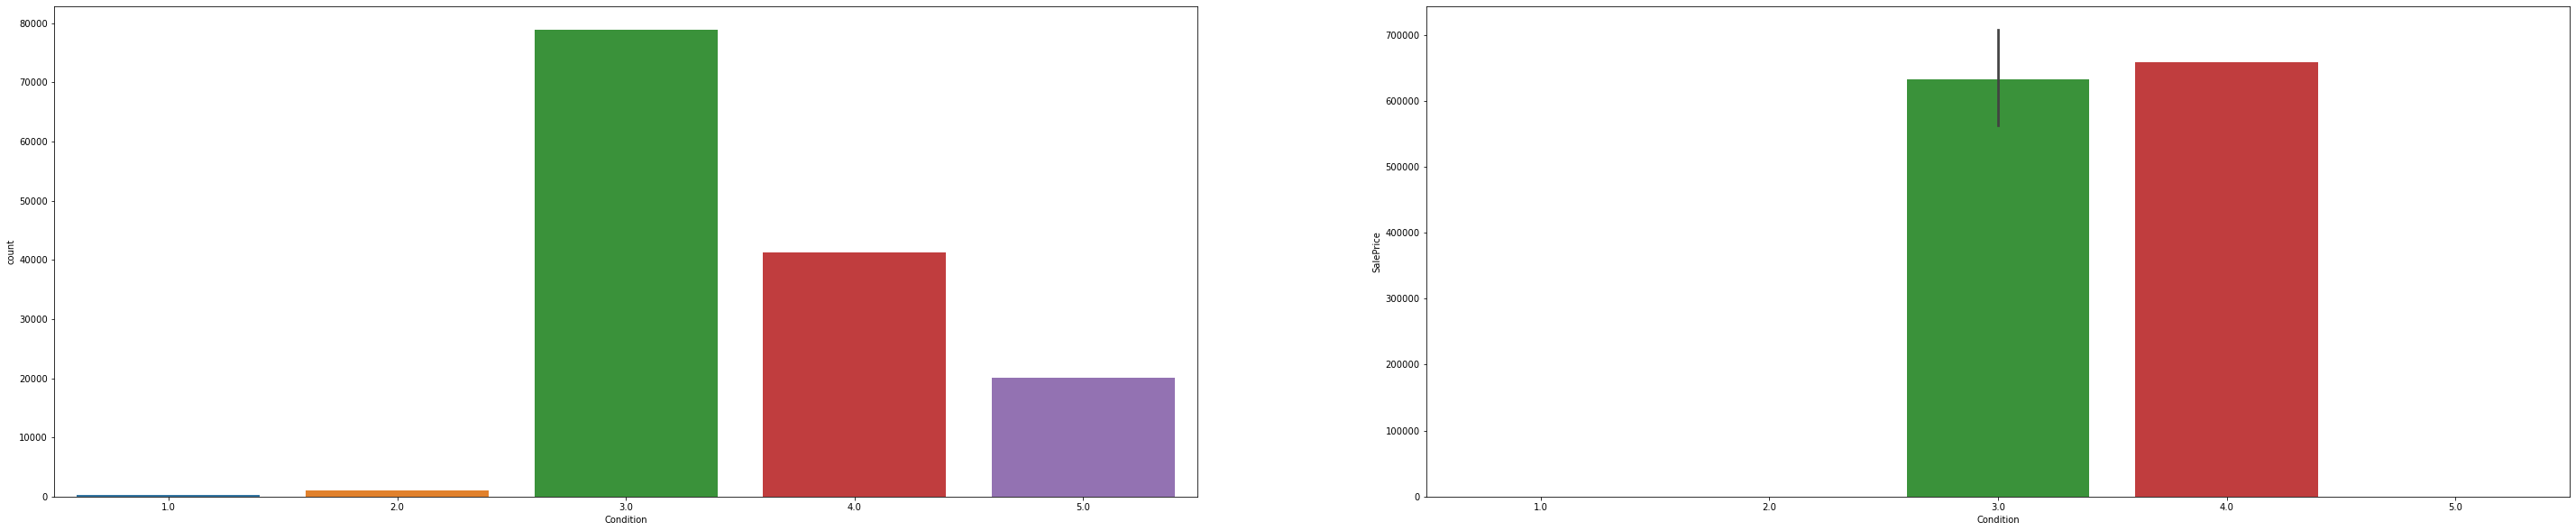

In [24]:
mean = data.SalePrice.groupby(data['Condition']).mean()
condition = data.Condition

fig, ax = plt.subplots(1,2, figsize=(50,10))
sns.countplot(data.Condition, ax = ax[0])
sns.barplot(condition,mean, ax = ax[1]);

Interestingly, 'average' homes tend to do the best when it comes to the price of  a home. Note how those with a conditon rating of 3 and 4 have higher sale prices.
I'll see next if the number of bedrooms and bathrooms contribute to the price or not.

In [26]:
data[['SalePrice','Bedrooms','Bathrooms','SqFtTotLiving']].corr()

,SalePrice,Bedrooms,Bathrooms,SqFtTotLiving
SalePrice,1.000000,0.171813,0.304800,0.388234
Bedrooms,0.171813,1.000000,0.553911,0.610098
Bathrooms,0.304800,0.553911,1.000000,0.771530
SqFtTotLiving,0.388234,0.610098,0.771530,1.000000


As expected, there is a much higher correlation with total living square footage than with sale price. Larger homes tend to be more expensive as well as have more bedrooms and bathrooms.

C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


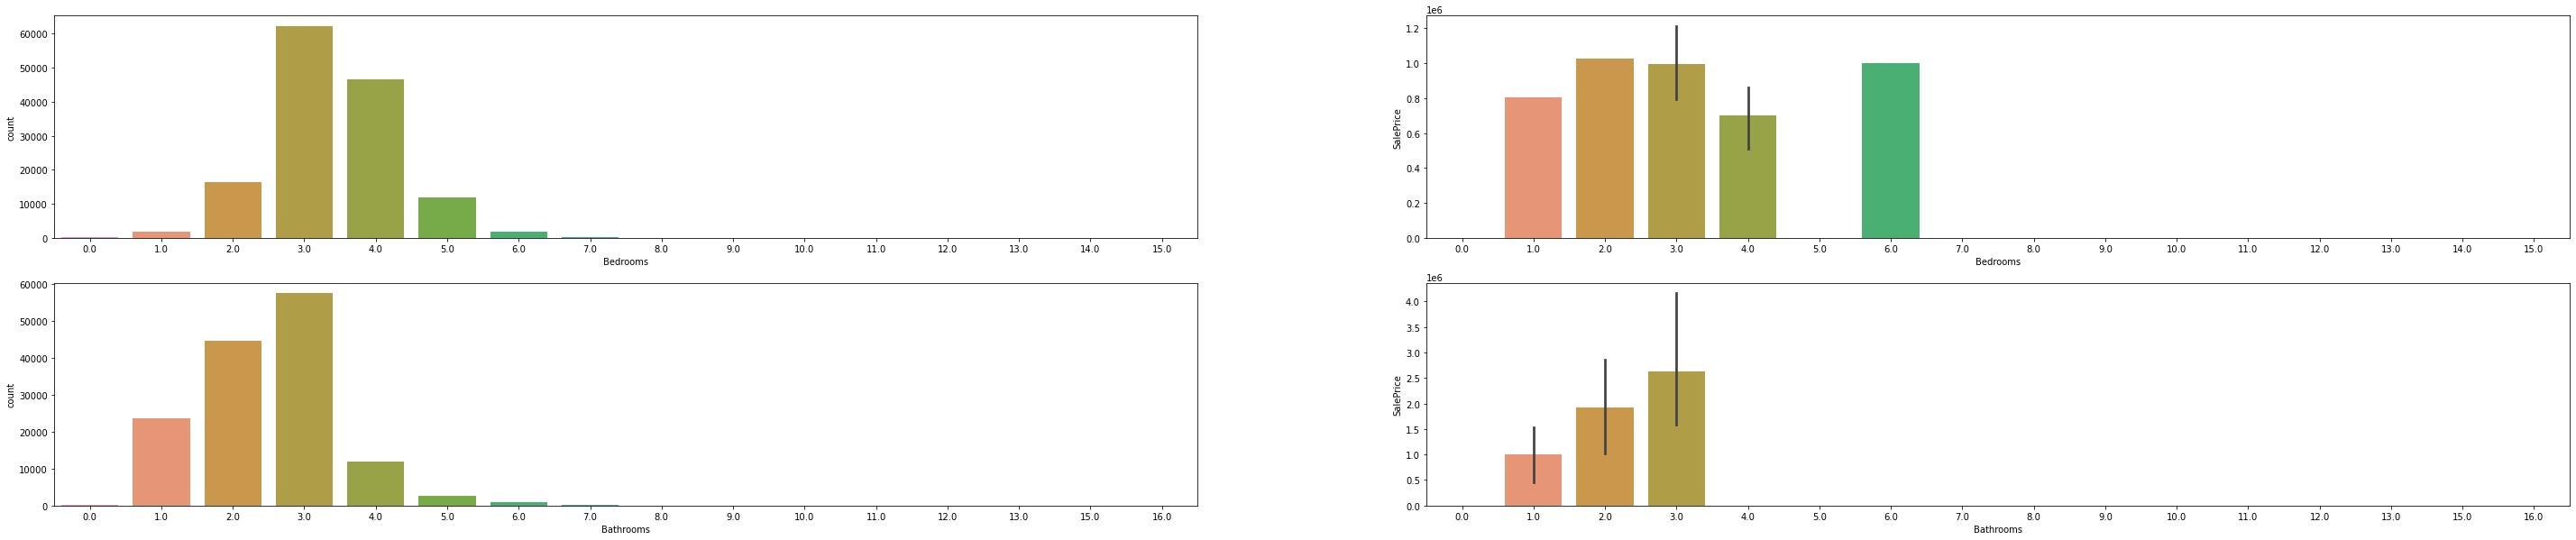

In [28]:
bedmean = data.SalePrice.groupby(data['Bedrooms']).mean()
bed = data.Bedrooms
bathmean = data.SalePrice.groupby(data['Bathrooms']).mean()
bath = data.Bathrooms

fig, ax = plt.subplots(2,2, figsize=(50,10))
sns.countplot(bed, ax = ax[0,0])
sns.barplot(bed,bedmean, ax = ax[0,1])
sns.countplot(bath, ax = ax[1,0])
sns.barplot(bath,bathmean, ax = ax[1,1]);

A decent number of homes are 3-4 beds with 2-3 baths - interestingly, there is no mean for 5 bedroom home sales.

In [33]:
bedmean

Bedrooms
0.0     5.096393e+05
1.0     5.991862e+05
2.0     5.304414e+05
3.0     5.877916e+05
4.0     8.013151e+05
5.0     1.000339e+06
6.0     1.079839e+06
7.0     1.100460e+06
8.0     9.466121e+05
9.0     1.107889e+06
10.0    8.601465e+05
11.0    7.325025e+05
12.0    9.490000e+05
13.0    1.606500e+06
14.0    1.440000e+06
15.0    1.025000e+06
Name: SalePrice, dtype: float64

In [37]:
data[['SalePrice','Township','SqFtTotLiving']].corr()

,SalePrice,Township,SqFtTotLiving
SalePrice,1.000000,0.189702,0.388234
Township,0.189702,1.000000,0.103564
SqFtTotLiving,0.388234,0.103564,1.000000


Township doesn't appear to have much of a correlation with either SalePrice or SqFtTotLiving.

C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


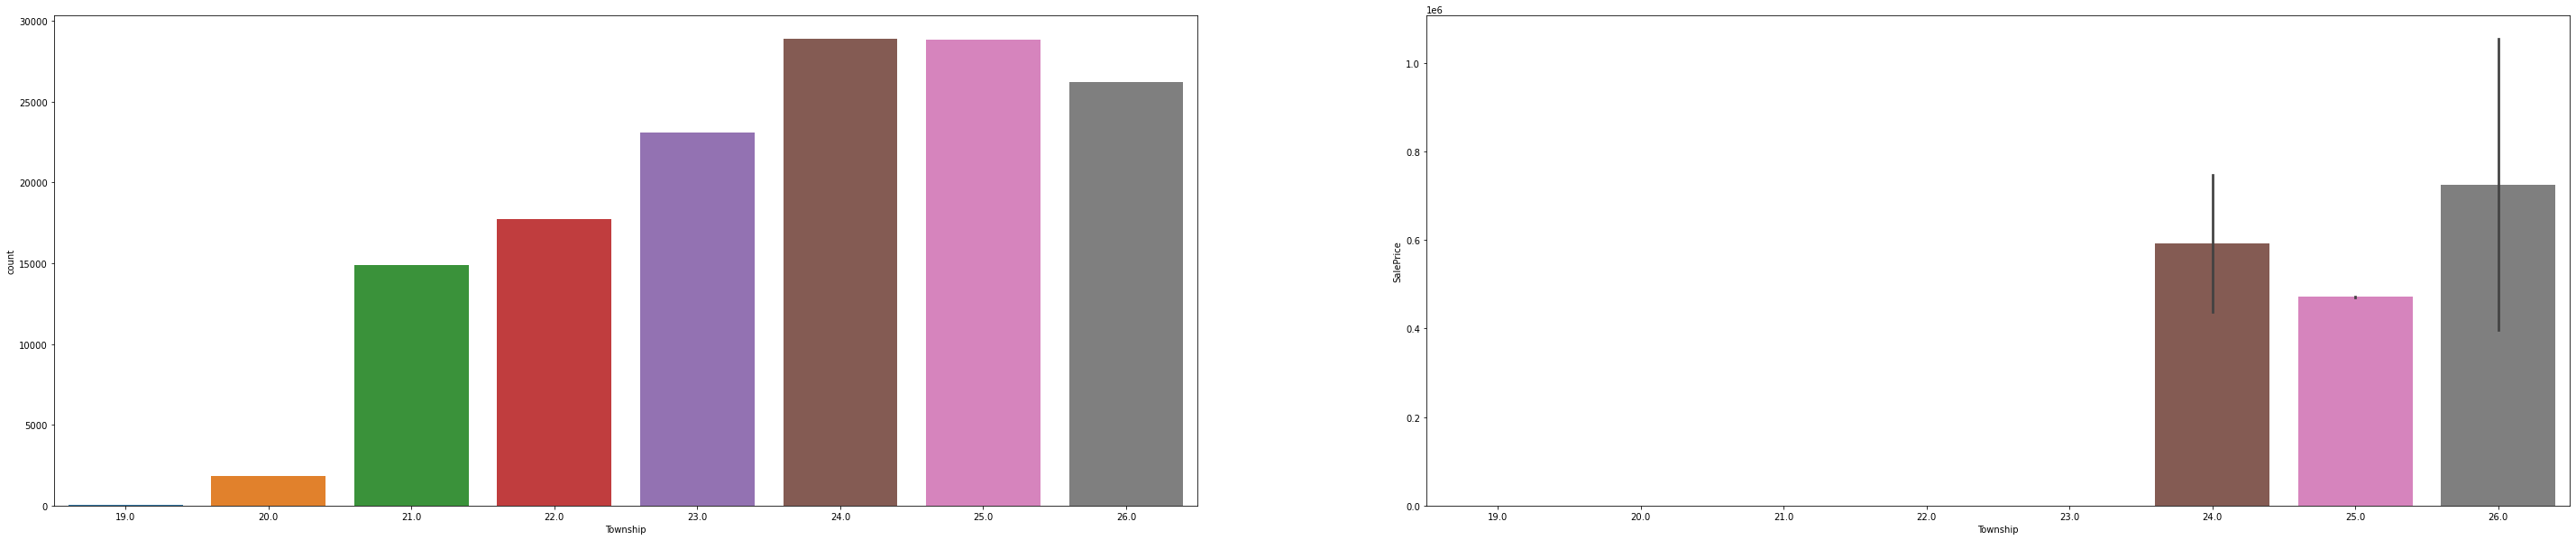

In [38]:
mean = data.SalePrice.groupby(data['Township']).mean()
town = data.Township

fig, ax = plt.subplots(1,2, figsize=(50,10))
sns.countplot(town, ax = ax[0])
sns.barplot(town,mean, ax = ax[1]);

In [39]:
mean

Township
19.0    4.294364e+05
20.0    3.961315e+05
21.0    4.705823e+05
22.0    4.435373e+05
23.0    4.713692e+05
24.0    8.179518e+05
25.0    1.053924e+06
26.0    6.766085e+05
Name: SalePrice, dtype: float64

In [40]:
data.Township.value_counts()

24.0    28895
25.0    28838
26.0    26225
23.0    23096
22.0    17754
21.0    14903
20.0     1812
19.0       22
Name: Township, dtype: int64

It's worth noting that townships 24, 25, and 26 all have a much higher sale price than the others, while 20 and 19 have significantly lower ones. I will run a t-test by grouping 21, 22, 23 together, and 24, 25, 26 into another group to see if the higher mean sale price in the second group is truly different than the first.

In [41]:
priceship = data[['SalePrice','Township']]

t_high = (24,25,26)
t_low = (21,22,23)

townhigh = priceship[priceship.Township.isin(t_high)]
townlow = priceship[priceship.Township.isin(t_low)]

print(townhigh.shape)
print(townlow.shape)

(83958, 2)
(55753, 2)


In [44]:
from scipy.stats import ttest_ind

townhigh = townhigh.SalePrice
townlow = townlow.SalePrice

df = (len(townhigh)-1) + (len(townlow)-1)#<-- equal to n of sample 1-1 + n of sample 2 -1
#<--The Alpha value for this test is .05 because since it is one-sided, we only need the value below .95
critical_tstat_below = stats.t.ppf(.95,df)
print(f'critical_t_stat: {critical_tstat_below}')

ttest_result = ttest_ind(townhigh,townlow, equal_var=False)
print(f'test t-stat: {ttest_result.statistic}')
#because the pvalue generated for this would be 2-way, we need to divide by 2 to get the correct pvalue
print(f'pvalue - {ttest_result.pvalue/2}')

AttributeError: 'Series' object has no attribute 'SalePrice'